In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Step 1: Data Loading
file_path =  "/Users/bhanupodele/Downloads/Air_Quality.csv"
df = pd.read_csv(file_path)



In [20]:
# Convert 'Start_Date' to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

In [21]:
# Analyze trends over time for NO2
no2_trends = df[df['Name'] == 'Nitrogen dioxide (NO2)'].pivot_table(
    index='Start_Date', 
    columns='Geo Place Name', 
    values='Data Value'
)


In [22]:
import matplotlib.pyplot as it


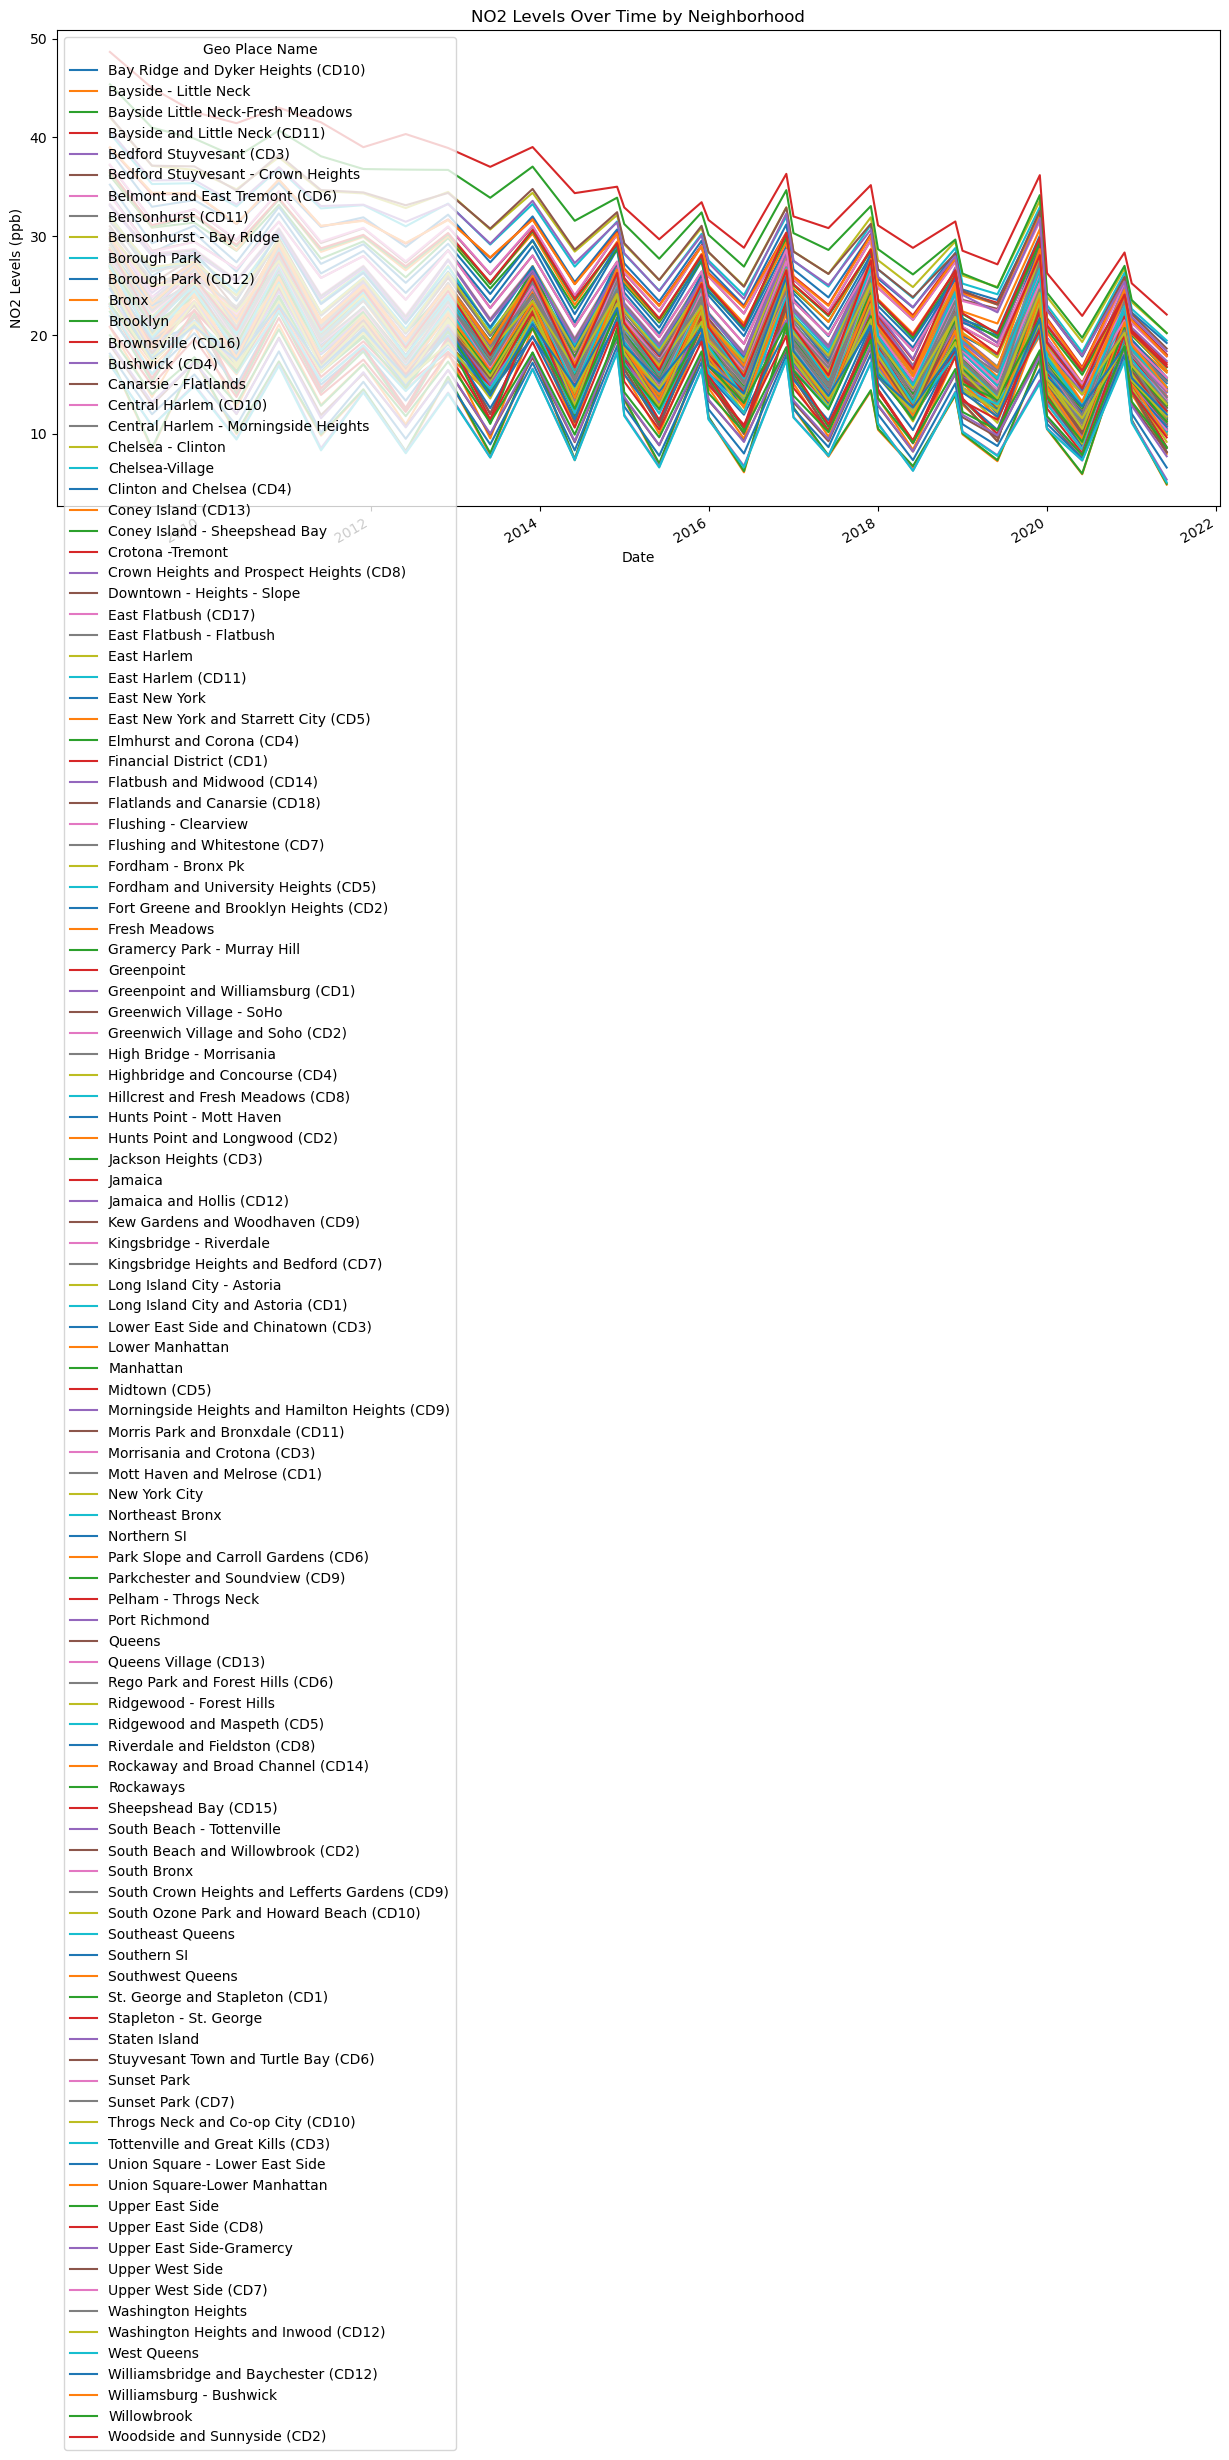

In [23]:
# Plot NO2 trends over time

import matplotlib.pyplot as plt

# Assuming no2_trends is a DataFrame with a datetime index and one or more columns of NO2 levels
no2_trends.plot(figsize=(15, 7))
plt.title('NO2 Levels Over Time by Neighborhood')
plt.xlabel('Date')
plt.ylabel('NO2 Levels (ppb)')
plt.show()  



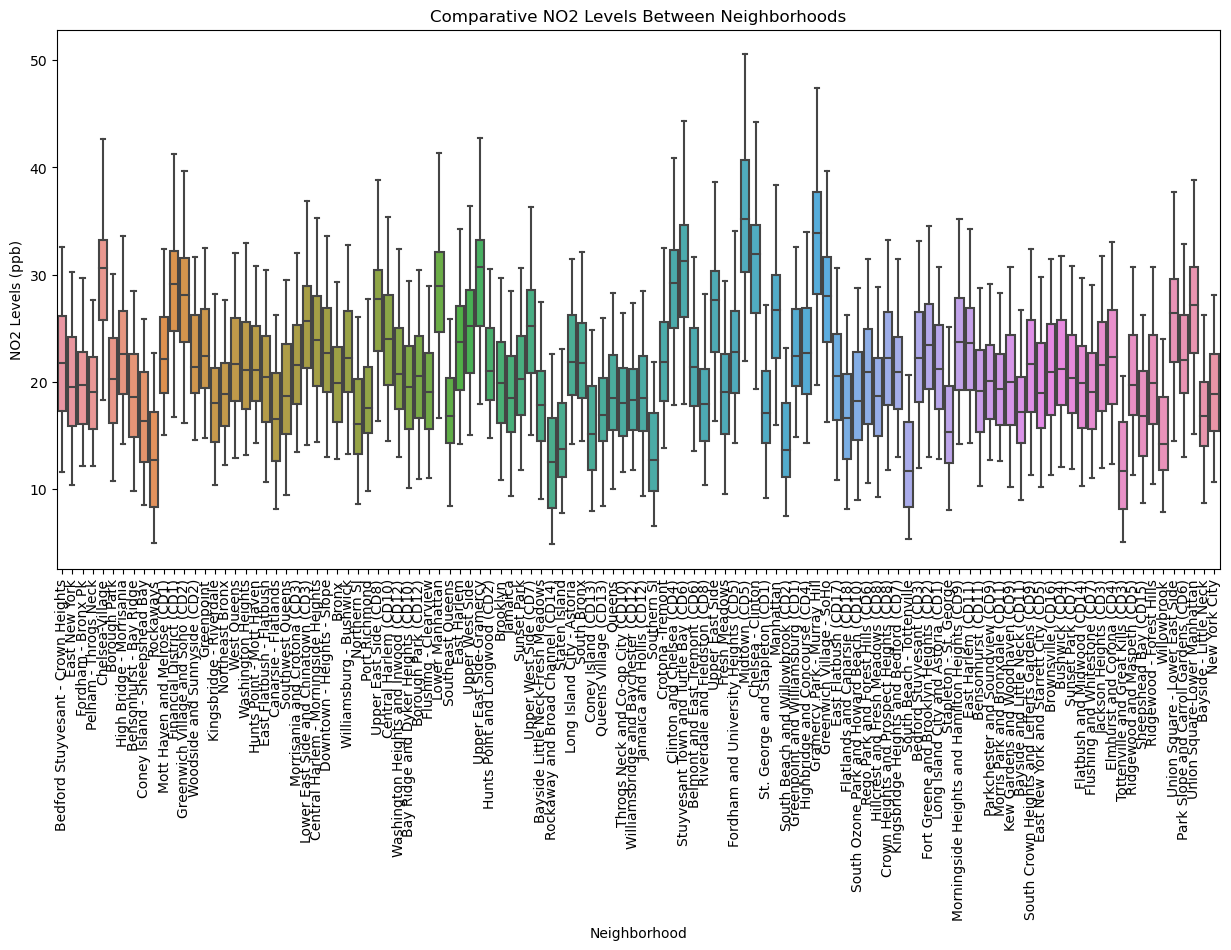

In [24]:
# Compare NO2 levels between neighborhoods
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.boxplot(x='Geo Place Name', y='Data Value', data=df[df['Name'] == 'Nitrogen dioxide (NO2)'])
plt.xticks(rotation=90)
plt.title('Comparative NO2 Levels Between Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('NO2 Levels (ppb)')
plt.show()

In [25]:
# Analyze seasonal variation in NO2 levels
df['Year'] = df['Start_Date'].dt.year
df['Season'] = df['Time Period'].str.extract('(Winter|Summer|Annual)')
seasonal_variation = df.pivot_table(
    index='Year', 
    columns='Season', 
    values='Data Value', 
    aggfunc='mean'
)

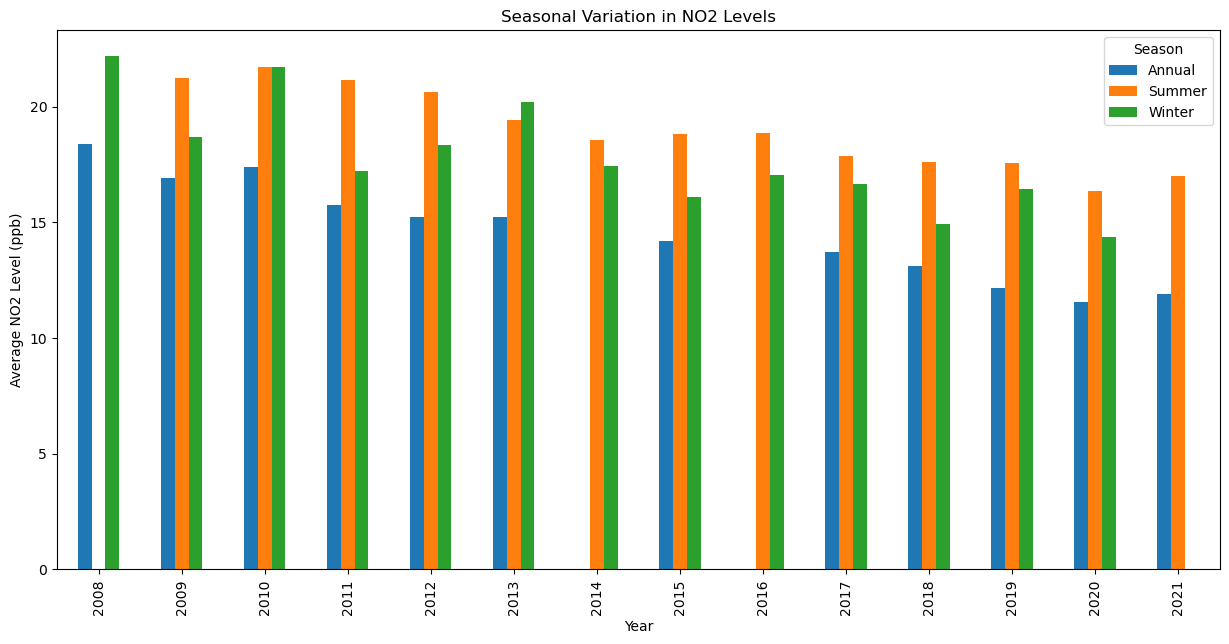

In [26]:
# Plot seasonal variation
seasonal_variation.plot(kind='bar', figsize=(15, 7))
plt.title('Seasonal Variation in NO2 Levels')
plt.xlabel('Year')
plt.ylabel('Average NO2 Level (ppb)')
plt.legend(title='Season')
plt.show()

In [27]:
import pandas as pd

# Assuming 'df' is your DataFrame after loading the Air_Quality.csv file
# and it looks similar to the data you provided.

# For correlation, we need numeric data, so ensure that 'Data Value' is numeric
df['Data Value'] = pd.to_numeric(df['Data Value'], errors='coerce')

# Convert 'Start_Date' to datetime if it's not already in that format
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')

# Extract the year from 'Start_Date' as it might have a correlation with 'Data Value'
df['Year'] = df['Start_Date'].dt.year

# Selecting numeric columns for correlation
numeric_columns = ['Year', 'Data Value']

# Calculate the correlation matrix for the selected numerical features
correlation_matrix = df[numeric_columns].corr()

print(correlation_matrix)


                Year  Data Value
Year        1.000000   -0.177502
Data Value -0.177502    1.000000


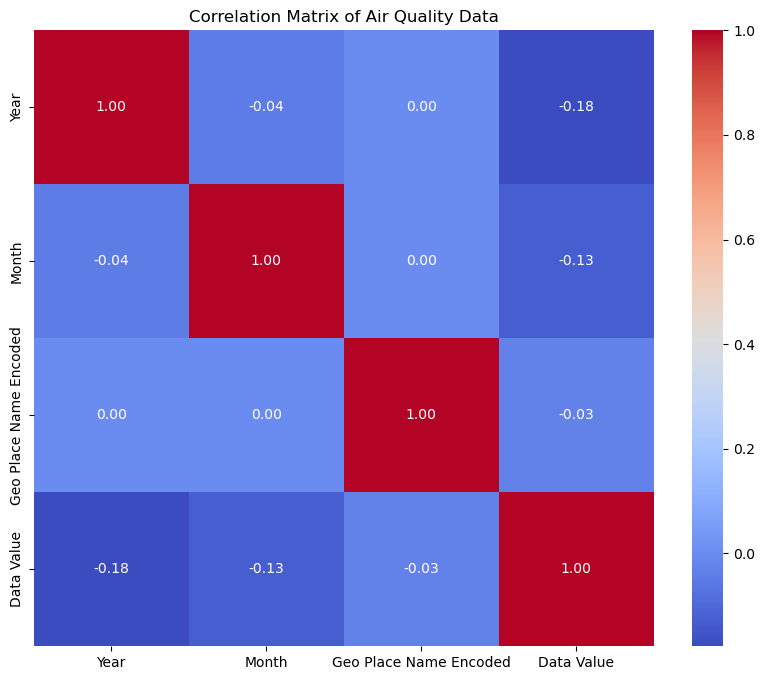

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the dataset into a DataFrame called df

# Convert 'Start_Date' to datetime and extract year and month for correlation
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Year'] = df['Start_Date'].dt.year
df['Month'] = df['Start_Date'].dt.month

# Encode 'Geo Place Name' for correlation
# Assuming 'Geo Place Name' is a categorical variable that needs to be encoded
df['Geo Place Name Encoded'] = df['Geo Place Name'].astype('category').cat.codes

# Select the numeric columns for correlation
numeric_columns = ['Year', 'Month', 'Geo Place Name Encoded', 'Data Value']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Air Quality Data')
plt.show()


In [29]:

# Convert 'Start_Date' to datetime and extract year and month
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Year'] = df['Start_Date'].dt.year
df['Month'] = df['Start_Date'].dt.month

# Encode categorical variables
le = LabelEncoder()
df['Geo Place Name Encoded'] = le.fit_transform(df['Geo Place Name'])

# Select features and target variable for the model
features = ['Year', 'Month', 'Geo Place Name Encoded']
X = df[features]
y = df['Data Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Evaluate the model using cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-np.mean(scores)}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")

# Retrain the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)
best_y_pred = best_rf.predict(X_test)
best_mse = mean_squared_error(y_test, best_y_pred)
print(f"Mean Squared Error of the best model: {best_mse}")

# Optionally, you can also print feature importances
feature_importances = best_rf.feature_importances_
print(feature_importances)


Mean Squared Error: 450.6314090249918
Cross-validated MSE: 437.86329980914724
Best parameters: {'max_depth': 10, 'n_estimators': 150}
Best score: 405.7328506441477
Mean Squared Error of the best model: 403.11759124976055
[0.29589391 0.12240021 0.58170588]


In [30]:
# Let's proceed with the preprocessing of the dataset.

# Re-load the data to refresh the DataFrame
file_path = "/Users/bhanupodele/Downloads/Air_Quality.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Geo Place Name Encoded'] = label_encoder.fit_transform(df['Geo Place Name'])

# Handle missing values by filling them with the mean for numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical data, fill missing values with the mode (most frequent value)
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Convert 'Start_Date' to datetime and extract year as a feature
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Year'] = df['Start_Date'].dt.year

# Splitting the data into features and target variable
# Assuming 'Data Value' is the target variable and the rest are features
# Also, assuming 'Unique ID' is just an identifier and should be excluded from features
X = df.drop(['Data Value', 'Unique ID', 'Start_Date'], axis=1)
y = df['Data Value']

# Encoding all remaining categorical features
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The dataset is now preprocessed and ready for model training.
# X_train, X_test, y_train, y_test can now be used for further modeling.
X_train.head()


,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Geo Place Name Encoded,Year
15596,647,15,0,7,1,307,97,4,97,2011
9736,365,12,5,0,1,307,97,33,97,2018
12923,375,13,5,6,1,208,80,48,80,2019
333,375,13,5,6,1,202,51,22,51,2020
10794,659,4,2,3,4,106,47,5,47,2012


In [31]:
# It seems that the rf_regressor was not defined due to the reset of the execution state.
# I will re-import the necessary libraries, re-train the Random Forest Regressor, and evaluate it again.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Re-train the Random Forest Regressor on the training data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using the mean squared error
mse = mean_squared_error(y_test, y_pred)
mse


19.295908442373616

In [35]:
from sklearn.model_selection import GridSearchCV
# Assuming 'rf' is your RandomForest estimator and 'param_grid' is defined

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [36]:
# Need to re-import numpy due to the reset of the execution state
import numpy as np

# Filter out only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
correlation_matrix_numeric = numeric_df.corr()

correlation_matrix_numeric



,Unique ID,Indicator ID,Geo Join ID,Data Value,Geo Place Name Encoded,Year
Unique ID,1.000000,-0.130001,0.005209,-0.098505,0.000378,0.872188
Indicator ID,-0.130001,1.000000,-0.038544,0.258522,-0.001306,-0.364077
Geo Join ID,0.005209,-0.038544,1.000000,-0.006778,0.068302,0.014053
Data Value,-0.098505,0.258522,-0.006778,1.000000,-0.028996,-0.177502
Geo Place Name Encoded,0.000378,-0.001306,0.068302,-0.028996,1.000000,0.000354
Year,0.872188,-0.364077,0.014053,-0.177502,0.000354,1.000000


In [38]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': ['Nitrogen dioxide (NO2)', 'Ozone (O3)', 'Sulfur dioxide (SO2)', 'Carbon monoxide (CO)']
})

# Checking data types
print(df.dtypes)

# Assuming 'C' is the problematic column, we drop it for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Now calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)


A     int64
B     int64
C    object
dtype: object
     A    B
A  1.0  1.0
B  1.0  1.0


In [40]:
# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")


Best parameters: {'max_depth': 20, 'n_estimators': 100}
Best score: 26.883266251613797


In [43]:
# Retrain the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on the test data
best_y_pred = best_rf.predict(X_test)

# Calculate the Mean Squared Error
best_mse = mean_squared_error(y_test, best_y_pred)

# Print the Mean Squared Error of the best model
print(f"Mean Squared Error of the best model: {best_mse}")


Mean Squared Error of the best model: 19.266183594980728


In [45]:
# Optionally, you can also print feature importances
feature_importances = best_rf.feature_importances_

# Print the feature importances
print(feature_importances)


[0.09986366 0.22545205 0.11284335 0.13287662 0.00390471 0.27796472
 0.04850275 0.03032392 0.0517742  0.01649401]


     A    B
A  1.0  1.0
B  1.0  1.0


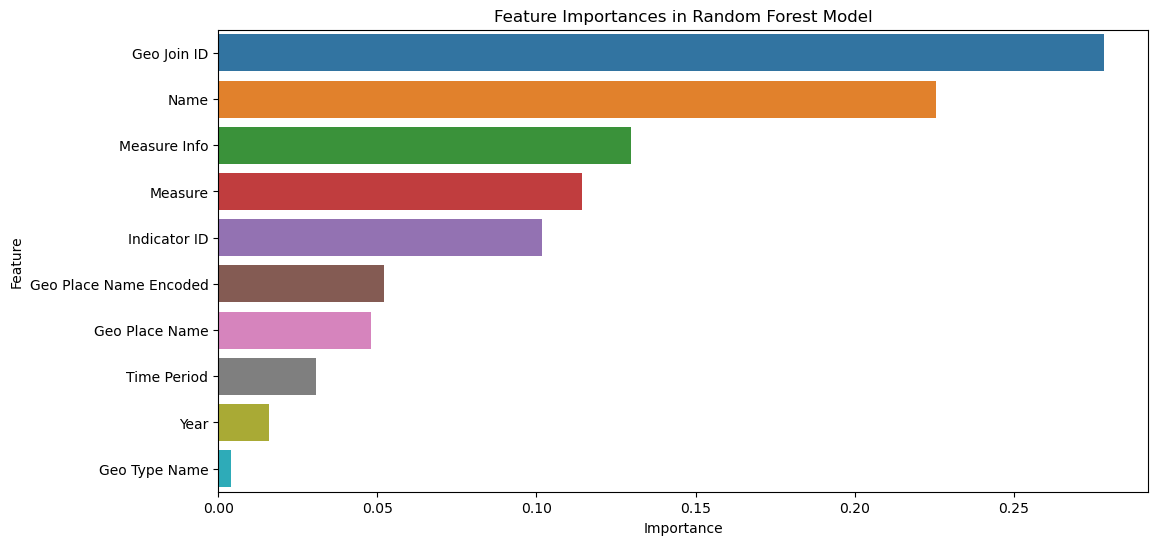

              A         B
count  4.000000  4.000000
mean   2.500000  6.500000
std    1.290994  1.290994
min    1.000000  5.000000
25%    1.750000  5.750000
50%    2.500000  6.500000
75%    3.250000  7.250000
max    4.000000  8.000000


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df and X_train are already defined
# Assuming rf_regressor is already trained

# Select only numeric columns for correlation matrix calculation
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for these numeric columns
correlation_matrix = numeric_cols.corr()

# Displaying the correlation matrix
print(correlation_matrix)

# Analyzing feature importance
feature_importances = rf_regressor.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sorting by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Basic Statistical Analysis
basic_stats = df.describe()

# Displaying basic statistics
print(basic_stats)
